In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("twitter.csv")

In [3]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
data = dataset[["tweet","class"]]
data

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [7]:
import nltk
import re
import string

In [8]:
from nltk.corpus import stopwords

In [9]:
_stopwords = set(stopwords.words("english"))

In [10]:
_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
_stopwords.add("rt")

In [12]:
# Import stemming
stemmer = nltk.SnowballStemmer("english")

In [13]:
# Data cleaning
def clean_data(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'https?://\S+|www\.S+', '', text)  # Remove video URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove punctuation
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'\w*\d\d', ' ', text)  # Remove non-word characters (except spaces)
    
    # Removing stopwords
    text = [word for word in text.split(' ') if word not in _stopwords]
    text = " ".join(text)
    
    # Stemming
    text = [stemmer.stem(word) for word in text.split(' ')]  # Apply stemming to each word
    text = " ".join(text)
    
    return text

In [14]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\vijay\AppData\Local\Temp\ipykernel_9372\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [15]:
data

,tweet,class
0,mayasolov woman shouldnt complain clean hous ...,2
1,boy dat coldtyga dwn bad cuffin dat hoe 1st...,1
2,urkindofbrand dawg sbaby4lif ever fuck bitch...,1
3,cganderson vivabas look like tranni,1
4,shenikarobert shit hear might true might fake...,1
...,...,...
24778,yous muthafin lie lifeask pearl coreyemanuel...,1
24779,youv gone broke wrong heart babi drove redneck...,2
24780,young buck wanna eat dat nigguh like aint fuck...,1
24781,youu got wild bitch tellin lie,1


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [17]:
X = np.array(data["tweet"])
y = np.array(data["class"])

In [18]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [19]:
X

<24783x27565 sparse matrix of type '<class 'numpy.int64'>'
	with 194700 stored elements in Compressed Sparse Row format>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18)

In [21]:
X_train

<20322x27565 sparse matrix of type '<class 'numpy.int64'>'
	with 159614 stored elements in Compressed Sparse Row format>

In [22]:
# Building out ML Model
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier(max_depth=26)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=26)

In [24]:
y_pred = dt.predict(X_test)

In [25]:
# Confusion matrix and accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [26]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.33      0.10      0.15       240
           1       0.94      0.92      0.93      3424
           2       0.74      0.97      0.84       797

    accuracy                           0.89      4461
   macro avg       0.67      0.66      0.64      4461
weighted avg       0.87      0.89      0.87      4461



In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

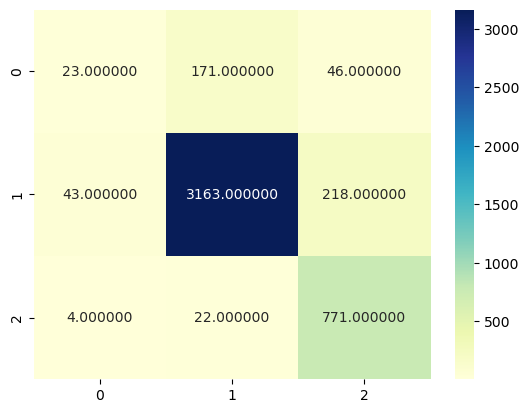

In [28]:
sns.heatmap(cm, annot = True, fmt = "f", cmap="YlGnBu")
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.887020847343645